In [58]:
import argparse
import sys

import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.utils.data as data_utils


In [50]:
t = transforms.Compose([
    transforms.Resize((25,25)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1),
    # transforms.RandomAutocontrast(p=1), # p=1 so all images are autocontrasted
    # transforms.Normalize([0.5], [0.5])
])
train_data = torchvision.datasets.ImageFolder("../data/processed/train", transform=t)


In [67]:
indices = torch.arange(2000)
train_data_5k = data_utils.Subset(train_data, indices)
len(train_data_5k)

2000

In [68]:
train_loader = DataLoader(train_data_5k, batch_size=128,
                              shuffle=True, num_workers=0)

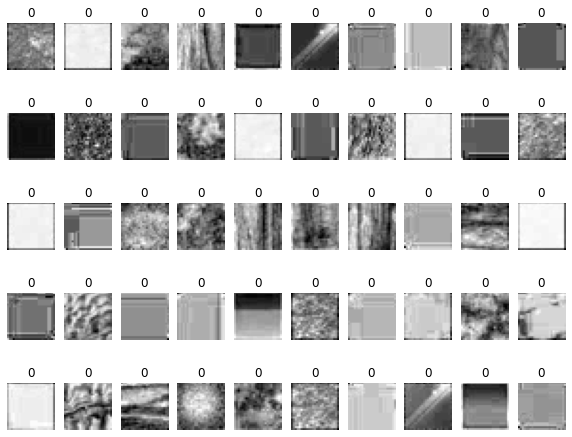

In [61]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

figure = plt.figure(figsize=(10, 8))
cols, rows = 10, 5
for i in range(1, cols * rows + 1):
    img = images[i]
    figure.add_subplot(rows, cols, i)
    plt.title(labels[i].item())
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")